Simple Linear Regression
Intercept: -2.443668169752888
Coefficients: [0.00734377]
Mean Absolute Error: 0.26
Mean Squared Error: 0.12
R² Score: 0.37


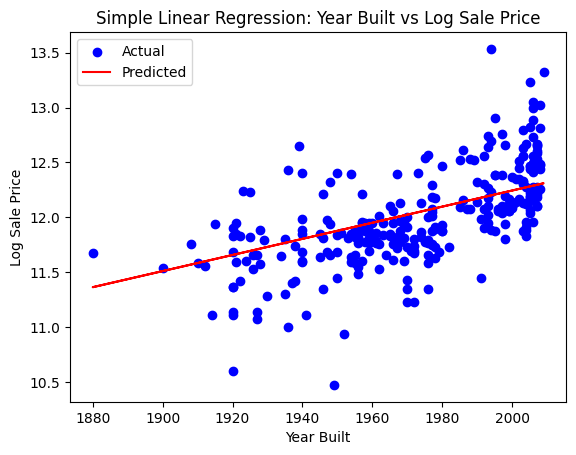

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# load home dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df = df.drop(['ID'], axis=1)

# appily log-transform the target (SALESPRICE) to increase stablitlity
df['LOG_SALEPRICE'] = np.log(df['SALEPRICE'])

# Prepare features and target
X = df[['YEARBUILT']]
y = df['LOG_SALEPRICE']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# prediction regression line
y_pred = model.predict(X_test)

# Metrics output
# Metrics output
print("Simple Linear Regression")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# grpah result and label axis with year built and log sale price
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Year Built')
plt.ylabel('Log Sale Price')
plt.title('Simple Linear Regression: Year Built vs Log Sale Price')
plt.legend()
plt.show()


Next model is a multi linear regression model working on improvements

In [4]:
# add libraries for model computation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# load home dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df = df.drop(['ID'], axis=1)

# log-transform the target variable (SALESPRICE)
df['LOG_SALEPRICE'] = np.log(df['SALEPRICE'])

# prepare features and target
X = df.drop(['SALEPRICE', 'LOG_SALEPRICE'], axis=1)
y = df['LOG_SALEPRICE']



#identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# preprocessing
# standardScaler: standardizes numerical features to have a mean of 0 and a standard deviation of 1
# OneHotEncoder Encodes categorical variables into a binary format while ignoring unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)



# ridge Regression (L2 regularization), reduces overffiting
# 'alpha' controls the strength of regularization
model = Pipeline(steps=[
    ('preprocessor', preprocessor), # preprocessing step: scales numerical features and encodes categorical ones
    ('regressor', Ridge(alpha=1.0)) # Ridge regression with L2 regularization (alpha=1.0)

])


#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
model.fit(X_train, y_train)

# Prediction regression line for visualizing reuslts
y_pred = model.predict(X_test)

# output metrics
print("Multiple Linear Regression with Ridge")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Multiple Linear Regression with Ridge
Mean Absolute Error: 0.14
Mean Squared Error: 0.04
R² Score: 0.80


Polynomial linear regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df = df.drop(['ID'], axis=1)

# Log-transform the target variable (SALEPRICE)
df['LOG_SALEPRICE'] = np.log(df['SALEPRICE'])

# Prepare features and target
X = df[['YEARBUILT']]
y = df['LOG_SALEPRICE']

# Polynomial Regression Pipeline
model = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Prediction trend line for output
y_pred = model.predict(X_test)

# Output metrics to terminal
print("Polynomial Regression")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Polynomial Regression
Mean Absolute Error: 0.26
Mean Squared Error: 0.12
R² Score: 0.38


Decisoin tree regression


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df = df.drop(['ID'], axis=1)

# Log-transform the target variable
df['LOG_SALEPRICE'] = np.log(df['SALEPRICE'])

# Prepare features and target
X = df.drop(['SALEPRICE', 'LOG_SALEPRICE'], axis=1)
y = df['LOG_SALEPRICE']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Decision Tree with constraints
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Output metrics to terminal
print("Decision Tree Regression")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Decision Tree Regression
Mean Absolute Error: 0.16
Mean Squared Error: 0.05
R² Score: 0.74


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")
df = df.drop(['ID'], axis=1)

# Log-transform the target variable
df['LOG_SALEPRICE'] = np.log(df['SALEPRICE'])

# Prepare features and target
X = df.drop(['SALEPRICE', 'LOG_SALEPRICE'], axis=1)
y = df['LOG_SALEPRICE']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Random Forest Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)

# Metrics
print("Random Forest Regression")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Best Parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Random Forest Regression
Mean Absolute Error: 0.13
Mean Squared Error: 0.03
R² Score: 0.82
